{'D_A': [0.194, 1.158, 0.651, 0.818, 0.798, 0.773, 0.474, 0.779, 0.754, 0.543, 0.756, 0.831, 0.811, 0.481, 1.0, 0.801, 0.517, 0.752, 0.741, 0.777, 0.659, 0.736, 0.75, 0.649, 0.831, 0.716, 0.713, 0.59, 0.732, 0.724, 0.865, 0.733, 0.654, 0.706, 0.651, 0.74, 0.739, 0.715, 0.705, 0.718, 0.731, 0.815, 0.755, 0.645, 0.676, 0.756, 0.744, 0.708, 0.703, 0.724, 0.748, 0.726, 0.746, 0.772, 0.602, 0.688, 0.714, 0.723, 0.615, 0.713, 0.697, 0.701, 0.719, 0.721, 0.672, 0.698, 0.649, 0.739, 0.65, 0.771, 0.724, 0.68, 0.695, 0.672, 0.685, 0.824, 0.783, 0.718, 0.717, 0.711, 0.651, 0.733, 0.753, 0.732, 0.684, 0.645, 0.729, 0.728, 0.692, 0.692, 0.698, 0.662, 0.721, 0.647, 0.654, 0.722, 0.616, 0.735, 0.641, 0.692, 0.772, 0.781, 0.666, 0.823, 0.639, 0.718, 0.692, 0.676, 0.671, 0.726, 0.692, 0.678, 0.736, 0.659, 0.672, 0.679, 0.716, 0.643, 0.626, 0.637, 0.701, 0.733, 0.697, 0.688, 0.665, 0.634, 0.766, 0.736, 0.652, 0.672, 0.722, 0.695, 0.915, 0.646, 0.761, 0.654, 0.685, 0.708, 0.772, 0.756, 0.702, 0.708, 0.77

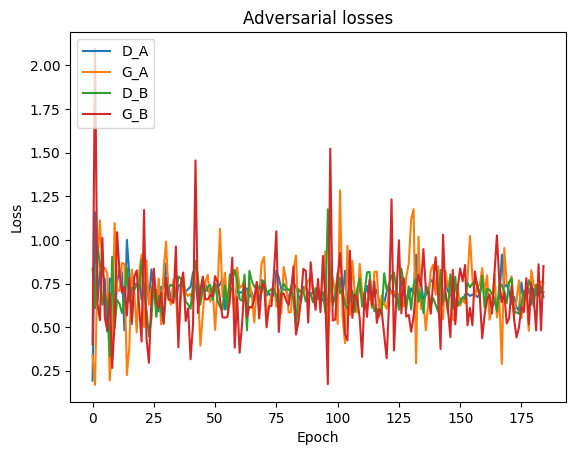

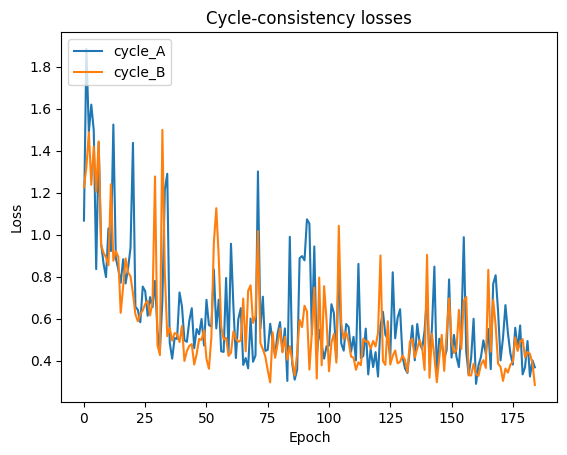

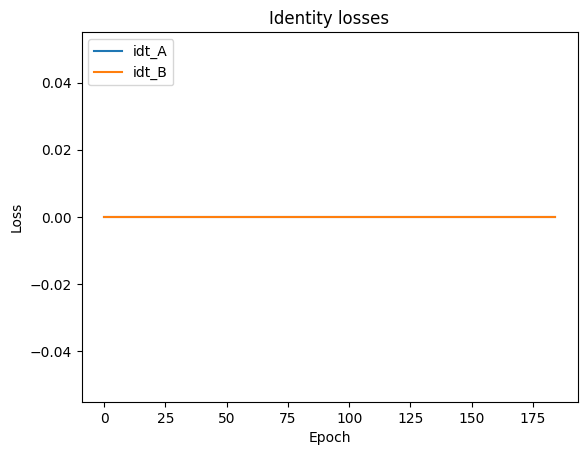

In [ ]:
import matplotlib.pyplot as plt

LOSS_NAMES = ('D_A', 'G_A', 'cycle_A', 'idt_A') + \
             ('D_B', 'G_B', 'cycle_B', 'idt_B')

epochs = []
losses = {loss: [] for loss in LOSS_NAMES}

with open('loss_log_no_idt.txt') as gan_loss_file:
    for line in gan_loss_file.readlines():
        if line[0] != '(':
            continue

        head, tail = line[1:].split(') ')
        head_split = head.split(', ')
        head_dict = {key: float(value) for key, value in [pair.split(': ') for pair in head_split]}
        tail_split = tail[:-2].replace(':', '').split(' ')
        tail_dict = {key: float(value) for key, value in zip(tail_split[::2], tail_split[1::2], strict=True)}
        entry = head_dict | tail_dict

        if entry['iters'] < 103:
            continue

        for loss in LOSS_NAMES:
            losses[loss].append(entry[loss])
        # epochs.append(entry['epoch'])

print(losses)

LOSS_FIGS = (
    ('Adversarial losses', ('D_A', 'G_A', 'D_B', 'G_B')),
    ('Cycle-consistency losses', ('cycle_A', 'cycle_B')),
    ('Identity losses', ('idt_A', 'idt_B'))
)
for title, fig_losses in LOSS_FIGS:
    for loss in fig_losses:
        epochs = range(len(losses[loss]))
        plt.plot(epochs, losses[loss], label=loss)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    plt.show()